# SITES SUITABILITY ANALYSIS - PREDICT NEW EV CHARGING STATION LOCATIONS IN VICTORIA
The rapid adoption of electric vehicles (EVs) is changing the transport sector and creating new challenges for urban planning and infrastructure development. As governments and communities move towards more sustainable mobility, the availability and accessibility of public charging infrastructure has become essential for EV uptake. Without adequate charging facilities, drivers may face "range anxiety" and regional inequities, which can slow down adoption and undermine broader sustainability goals.
This project focuses on the state of Victoria, Australia, where demand for EV infrastructure is growing but the location of existing charging stations is uneven. Many urban centers are relatively well served, while regional and high-traffic corridors often lack sufficient coverage. Finding suitable locations for new charging stations therefore requires a careful, data-driven approach that considers multiple factors such as population density, socio-economic characteristics, road traffic volumes, amenities, and the existing charging network.
By combining diverse datasets at the Statistical Area Level 2 (SA2) and using advanced analytics methods such as clustering, geospatial modeling, and demand–supply profiling, this project aims to create a framework for prioritizing new EV charging station sites. The results are presented through interactive dashboards and geospatial visualizations, ensuring that the analysis is not only thorough but also accessible to decision-makers. In this way, the project contributes both to the advancement of data-driven infrastructure planning and to the broader societal goal of accelerating sustainable transport adoption.


## Data Preprocessing part

### Introduction to Selected Features
To evaluate how suitable locations are for new EV charging stations, a set of carefully chosen features was combined at the SA2 level. Each feature captures an important aspect of demand, supply, or accessibility:

* **Population Density** and **Total Population** – represent the potential demand base, with higher densities showing stronger likelihood of usage.
* **IRSAD Score** – shows socio-economic conditions, highlighting areas with higher or lower capacity for EV adoption.
* **Charger Count** – shows the current level of supply, used to identify gaps compared to demand.
* **Amenities Count** – captures the availability of destinations such as supermarkets, restaurants, and hospitals, as drivers are more likely to charge while doing other activities.
* **Average Annual Daily Traffic Volume (AADT)** – represents vehicle flow and corridor importance, ensuring charging stations are accessible along busy routes.

Together, these features provide a comprehensive, multi-dimensional view of demand and supply dynamics, enabling strong clustering and candidate site identification.

### Victorian SA2 areas shapefile
The Statistical Area Level 2 (SA2) shapefile is a standard geographic boundary defined by the Australian Bureau of Statistics (ABS) as part of the Australian Statistical Geography Standard (ASGS). SA2s are designed to represent communities that interact socially and economically, and they provide a meaningful spatial unit for analyzing population and infrastructure patterns.
In this project, the SA2 shapefile was used as the base geographic layer to align and combine multiple datasets, including demographics, traffic flow, amenities, and charging station counts. By working at the SA2 level, the analysis ensures consistency with official population statistics while allowing detailed insights at a community scale across Victoria.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import all the neccessary libraries
import requests
import pandas as pd
import json
import geopandas as gpd

In [3]:
# import the Statistical Areas Level 2 data set in whole australia
gdf_sa2 = gpd.read_file("/content/drive/MyDrive/data/New folder (2)/New folder/SA2_2021_AUST_GDA2020.shp")
gdf_sa2.head()

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.218 -35.366..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.0032,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.6748,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.19572 -35.36126, 149.1997 -35.35..."


<Axes: >

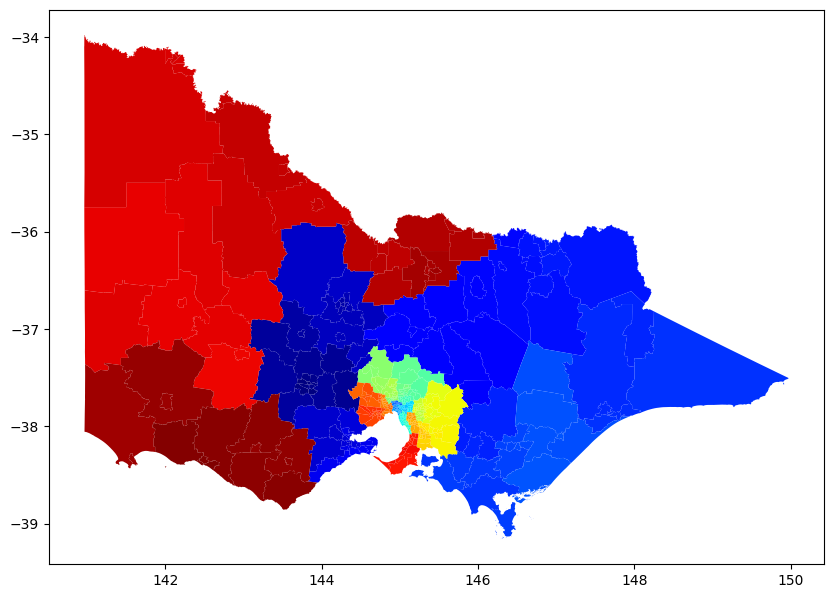

In [4]:
# Filter only SA2 in Victoria
gdf_vic = gdf_sa2[gdf_sa2["STE_NAME21"] == "Victoria"]
gdf_vic.plot(figsize=(10, 10), cmap = 'jet')

In [5]:
# Explore the SA2 victoria data set
gdf_vic.head()

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
644,201011001,Alfredton,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,52.7109,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5..."
645,201011002,Ballarat,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,12.3787,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5..."
646,201011005,Buninyong,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,51.5855,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6..."
647,201011006,Delacombe,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,34.1607,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.7505 -37.59119, 143.75044 -37.59..."
648,201011007,Smythes Creek,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,2,Victoria,AUS,Australia,104.7274,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6..."


In [6]:
gdf_vic_sample = gdf_vic.copy() # Make a copy of SA2 victoria data set
gdf_vic_sample.columns # Explore all the column of the dataset

Index(['SA2_CODE21', 'SA2_NAME21', 'CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21',
       'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21', 'GCC_CODE21', 'GCC_NAME21',
       'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21',
       'LOCI_URI21', 'geometry'],
      dtype='object')

In [7]:
gdf_vic.to_csv('gdf_vic.csv', index=False) # Download the data set for before usage

## Import population Data Set
###Population estimates and components by SA2 2023 to 2024
The population dataset at the Statistical Area Level 2 (SA2) is published by the Australian Bureau of Statistics (ABS) and provides official estimates of resident populations within each SA2 boundary. This dataset captures both total population counts and derived measures such as population density, which describe how people are spread across urban and regional areas.
In this project, the SA2 population dataset was a key input for assessing the potential demand for EV charging infrastructure. Areas with higher population counts and greater density are more likely to need charging stations to meet user needs. By combining population data with other indicators such as traffic volumes, socio-economic status, and existing chargers, the project identifies priority locations where charging demand is most significant.

In [8]:
# Try reading with 'latin1' encoding
population_data = pd.read_csv("/content/drive/MyDrive/data/New folder (2)/Population estimates and components by SA2 2023 to 2024.csv", encoding='latin1')
population_data.head(5) # Explore the population dataset

,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2)
0,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011001.0,Alfredton,18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,52.7,381.9
1,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011002.0,Ballarat,11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,12.4,951.1
2,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011005.0,Buninyong,7323.0,7358.0,35.0,0.5,13.0,-46.0,68.0,51.6,951.1
3,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011006.0,Delacombe,12865.0,14271.0,1406.0,10.9,175.0,1198.0,33.0,34.2,417.8
4,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011007.0,Smythes Creek,4267.0,4278.0,11.0,0.3,22.0,-14.0,3.0,104.7,40.8


In [9]:
# Checking for null values
population_data.isnull().sum()

,0
GCCSA code,0
GCCSA name,1
SA4 code,1
SA4 name,1
SA3 code,1
SA3 name,1
SA2 code,1
SA2 name,1
ERP at 30 June 2023,1
ERP at 30 June 2023.1,1


In [10]:
#Getting total population by multiplying area and the population density
population_data["Total Population"] = population_data[" Area"] * population_data["Population density 2024(persons/km2)"]
# Add a new column which is called Total population
population_data.head()

,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2),Total Population
0,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011001.0,Alfredton,18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,52.7,381.9,20126.13
1,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011002.0,Ballarat,11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,12.4,951.1,11793.64
2,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011005.0,Buninyong,7323.0,7358.0,35.0,0.5,13.0,-46.0,68.0,51.6,951.1,49076.76
3,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011006.0,Delacombe,12865.0,14271.0,1406.0,10.9,175.0,1198.0,33.0,34.2,417.8,14288.76
4,2RVIC,Rest of Vic.,201.0,Ballarat,20101.0,Ballarat,201011007.0,Smythes Creek,4267.0,4278.0,11.0,0.3,22.0,-14.0,3.0,104.7,40.8,4271.76


In [11]:
# change some column names in population dataset, maching with the SA2 dataset
population_data = population_data.rename(columns={'SA2 name':'SA2_NAME21'})
population_data.columns #Explore the columns

Index(['GCCSA code', 'GCCSA name', 'SA4 code', 'SA4 name', 'SA3 code',
       'SA3 name', 'SA2 code', 'SA2_NAME21', 'ERP at 30 June 2023',
       'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
       'Net internal migration', 'Net overseas migration', ' Area',
       'Population density 2024(persons/km2)', 'Total Population'],
      dtype='object')

In [12]:
# Exract the columns that we wanted to work with
population_data = population_data[[#'GCCSA code', 'GCCSA name', 'SA4 code', 'SA4 name', 'SA3 code','SA3 name',
        'SA2 code', 'SA2_NAME21', 'ERP at 30 June 2023',
       'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
       'Net internal migration', 'Net overseas migration', ' Area',
       'Population density 2024(persons/km2)', 'Total Population']].copy()

In [13]:
# Drop the rows which has been inluded null values
population_data.dropna(axis=0)


,SA2 code,SA2_NAME21,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2),Total Population
0,201011001.0,Alfredton,18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,52.7,381.9,20126.13
1,201011002.0,Ballarat,11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,12.4,951.1,11793.64
2,201011005.0,Buninyong,7323.0,7358.0,35.0,0.5,13.0,-46.0,68.0,51.6,951.1,49076.76
3,201011006.0,Delacombe,12865.0,14271.0,1406.0,10.9,175.0,1198.0,33.0,34.2,417.8,14288.76
4,201011007.0,Smythes Creek,4267.0,4278.0,11.0,0.3,22.0,-14.0,3.0,104.7,40.8,4271.76
...,...,...,...,...,...,...,...,...,...,...,...,...
517,217031476.0,Otway,3983.0,3948.0,-35.0,-0.9,-10.0,-60.0,35.0,1505.9,2.6,3915.34
518,217041477.0,Moyne - East,7131.0,7145.0,14.0,0.2,30.0,-41.0,25.0,3275.8,2.2,7206.76
519,217041478.0,Moyne - West,10147.0,10215.0,68.0,0.7,37.0,-16.0,47.0,2037.8,5.0,10189.00
520,217041479.0,Warrnambool - North,22761.0,22916.0,155.0,0.7,88.0,-80.0,147.0,62.4,367.1,22907.04


In [14]:
# Merge both population and SA areas dataset based on the SA2_names
gdf_vic = gdf_vic.merge(population_data, on="SA2_NAME21", how="left")
gdf_vic.head()

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,...,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2),Total Population
0,201011001,Alfredton,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,...,18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,52.7,381.9,20126.13
1,201011002,Ballarat,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,...,11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,12.4,951.1,11793.64
2,201011005,Buninyong,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,...,7323.0,7358.0,35.0,0.5,13.0,-46.0,68.0,51.6,951.1,49076.76
3,201011006,Delacombe,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,...,12865.0,14271.0,1406.0,10.9,175.0,1198.0,33.0,34.2,417.8,14288.76
4,201011007,Smythes Creek,0,No change,20101,Ballarat,201,Ballarat,2RVIC,Rest of Vic.,...,4267.0,4278.0,11.0,0.3,22.0,-14.0,3.0,104.7,40.8,4271.76


In [15]:
# Extract the dataset from merge dataset that I wanted to work with. And drop all the unneccessary columns that I don't need. And also, I have made a copy of the final dataset
gdf_vic_copy = gdf_vic[['SA2_CODE21', 'SA2_NAME21', 'geometry',
                   #'CHG_FLAG21', 'CHG_LBL21', 'SA3_CODE21',
       #'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21', 'GCC_CODE21', 'GCC_NAME21',
       #'STE_CODE21', 'STE_NAME21', 'AUS_CODE21', 'AUS_NAME21', 'AREASQKM21',
       #'LOCI_URI21', 'SA2 code',

                        'ERP at 30 June 2023',
       'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
       'Net internal migration', 'Net overseas migration', ' Area',
       'Population density 2024(persons/km2)', 'Total Population']].copy()

In [16]:
# Explore the rows withh null values in population dataset. Most of the columns have no data in these bath rows. So we can drop both two without a dout
rows_with_null = gdf_vic_copy[gdf_vic_copy.isnull().any(axis=1)]
rows_with_null.head()

,SA2_CODE21,SA2_NAME21,geometry,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2),Total Population
522,297979799,Migratory - Offshore - Shipping (Vic.),None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,299999499,No usual address (Vic.),None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop the rows with null values
gdf_vic_copy = gdf_vic_copy.dropna(axis=0)

In [18]:
# Check for the null values. Now we have a dataset without null values
gdf_vic_copy.isnull().sum()

,0
SA2_CODE21,0
SA2_NAME21,0
geometry,0
ERP at 30 June 2023,0
ERP at 30 June 2023.1,0
ERP change 2023-24,0
%,0
Natural increase,0
Net internal migration,0
Net overseas migration,0


## Import SEIFA data set
The Socio-Economic Indexes for Areas (SEIFA) is developed by the Australian Bureau of Statistics (ABS) to rank regions according to relative socio-economic advantage and disadvantage. SEIFA summarizes information from Census data, including factors such as income, education, employment, and housing characteristics. Among the indexes, the Index of Relative Socio-Economic Advantage and Disadvantage (IRSAD) is commonly used to provide a single measure of the socio-economic profile of an area.
In this project, SEIFA data at the SA2 level was used to capture the socio-economic capacity for EV adoption. Areas with higher IRSAD scores are generally more likely to adopt new technologies such as electric vehicles, while lower scores may indicate affordability or accessibility challenges. By including SEIFA in the analysis, the project ensures that charging infrastructure planning is fair, addressing both high-demand urban centers and potentially underserved communities.

In [19]:
# Import the SEIFA dataset from the drive
seifa_data = pd.read_csv("/content/drive/MyDrive/data/New folder (2)/Statistical Area Level 2, Indexes, SEIFA 2021.csv")

In [20]:
# Explore the column of the dataset
seifa_data.columns

Index(['2021 Statistical Area Level 2  (SA2) 9-Digit Code',
       '2021 Statistical Area Level 2 (SA2) Name ',
       'Usual Resident Population', 'Score', 'Unnamed: 4', 'Rank', 'Decile',
       'Percentile', 'Unnamed: 8', 'State', 'Rank.1', 'Decile.1',
       'Percentile.1', 'Minimum score for SA1s in area',
       'Maximum score for SA1s in area',
       '% Usual Resident Population without an SA1 level score'],
      dtype='object')

In [21]:
# drop unneccessary columns and make a copy of the dataset
seifa_data_copy = seifa_data[['2021 Statistical Area Level 2  (SA2) 9-Digit Code',
       '2021 Statistical Area Level 2 (SA2) Name ',
       'Usual Resident Population', 'Score',
                         #'Unnamed: 4',
                         'Rank', 'Decile',
                         #'Unnamed: 8', 'State', 'Rank.1', 'Decile.1',
       #'Percentile.1', 'Minimum score for SA1s in area',
       #'Maximum score for SA1s in area',
       #'% Usual Resident Population without an SA1 level score'
                         'Percentile']].copy()

In [22]:
# Rename the columns
seifa_data_copy = seifa_data_copy.rename(columns={'2021 Statistical Area Level 2  (SA2) 9-Digit Code': 'SA2_CODE21',
                                                  '2021 Statistical Area Level 2 (SA2) Name ':'SA2_NAME21',
                                                  'Score':'IRSAD Score',
                                                  'Rank':'IRSAD Rank',
                                                  'Decile':'IRSAD Decile',
                                                  'Percentile':'IRSAD Percentile'})

Score:
Typically refers to the actual SEIFA index value for the area—for example, the Index of Relative Socio-economic Advantage and Disadvantage (IRSAD) score. This is a continuous metric showing the relative position of the area in terms of socio-economic variables derived from Census data (national mean = 1000)

Rank:
The rank order of the SA2 area compared to all other SA2s in Australia, typically for the selected index (e.g., from most disadvantaged to most advantaged). A lower rank means more disadvantage in the case of the IRSAD

Decile:
This divides all SA2s into ten groups (each containing about 10% of areas) based on their SEIFA score. Decile 1 areas are among the most disadvantaged, while decile 10 are the most advantaged.

### Merge SEIFA dataset with previous final dataset, which includes SA2, and population data

In [23]:
gdf_vic_copy = gdf_vic_copy.merge(seifa_data_copy, on="SA2_CODE21", how="left")

In [24]:
# Drop the additional column, that we don't need
gdf_vic_copy = gdf_vic_copy.drop(columns="SA2_NAME21_y", axis=1)

In [25]:
# Change the column names and match with prevoius dataset.
gdf_vic_copy = gdf_vic_copy.rename(columns={'SA2_NAME21_x':'SA2_NAME21'})
gdf_vic_copy.head()

,SA2_CODE21,SA2_NAME21,geometry,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2),Total Population,Usual Resident Population,IRSAD Score,IRSAD Rank,IRSAD Decile,IRSAD Percentile
0,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,52.7,381.9,20126.13,16835.0,1011.0,1315.0,6.0,56.0
1,201011002,Ballarat,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,12.4,951.1,11793.64,12131.0,1040.0,1582.0,7.0,68.0
2,201011005,Buninyong,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6...",7323.0,7358.0,35.0,0.5,13.0,-46.0,68.0,51.6,951.1,49076.76,7261.0,1040.0,1587.0,7.0,68.0
3,201011006,Delacombe,"POLYGON ((143.7505 -37.59119, 143.75044 -37.59...",12865.0,14271.0,1406.0,10.9,175.0,1198.0,33.0,34.2,417.8,14288.76,10661.0,947.0,671.0,3.0,29.0
4,201011007,Smythes Creek,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6...",4267.0,4278.0,11.0,0.3,22.0,-14.0,3.0,104.7,40.8,4271.76,4230.0,1005.0,1260.0,6.0,54.0


# Getting Alll the EV charging locations according to SA2 areas

To accurately capture the existing EV charging infrastructure, the TomTom Places API was used to extract charging station locations across Victoria. This data provides up-to-date point-of-interest (POI) information, ensuring coverage beyond static government datasets. The retrieved charging station coordinates were then spatially joined with the SA2 boundaries, allowing each charging location to be assigned to its corresponding statistical area. This step enabled the calculation of charger counts per SA2, which serves as a key feature for analyzing supply levels and identifying gaps in the current network.

In [26]:
# This code is taken long time to excute. So I have commented it. And I have used dataset that I got from this code for upcoming analysis
'''import requests
import pandas as pd
import time

# Step 1: Replace with your actual TomTom API key
#API_KEY = 'tbuFqNsPVFKteaiFuU4mVrTTBky3dpSH'

# Step 2: Define search locations across Victoria
locations = {
    'Alfredton':(-37.54173636281507, 143.749330252453),
    'Ballarat':(-37.5561439450457, 143.83665489612585),
    'Buninyong':(-37.643854141582494, 143.880777903821),
    'Delacombe':(-37.58222851797997, 143.77847784283048),
    'Smythes Creek':(-37.62024909240558, 143.74623319717654),
    'Wendouree - Miners Rest':(-37.497553655938574, 143.80255434966588),
    'Ballarat East - Warrenheip':(-37.57007234665709, 143.90761119043637),
    'Ballarat North - Invermay':(-37.515863754350114, 143.89734669730916),
    'Canadian - Mount Clear':(-37.59239747284296, 143.87418185502426),
    'Sebastopol - Redan':(-37.595174074567716, 143.83647406270015),
    'Bacchus Marsh Surrounds':(-37.63030338480895, 144.30970705031817),
    'Creswick - Clunes':(-37.35415797513128, 143.8354339957665),
    'Daylesford':(-37.31776547274194, 144.18581542783056),
    'Gordon (Vic.)':(-37.64732793659666, 144.0393658825221),
    'Avoca':(-37.108931178077455, 143.3740595187135),
    'Beaufort':(-37.495969796117535, 143.39327544819014),
    'Golden Plains - North':(-37.77560623786848, 143.6265626500349),
    'Maryborough (Vic.)':(-37.047467574460406, 143.744063757512),
    'Maryborough Surrounds':(-36.98133748063582, 143.70710373781688),
    'Bendigo':(-36.748320743780475, 144.27025327243672),
    'California Gully - Eaglehawk':(-36.70665604436903, 144.26070108778046),
    'East Bendigo - Kennington':(-36.752323676776854, 144.31556903140003),
    'Flora Hill - Spring Gully':(-36.79161662646112, 144.28712763742024),
    'Kangaroo Flat - Golden Square':(-36.80638309926381, 144.24265138030466),
    'Maiden Gully':(-36.753859286031016, 144.20787983639303),
    'Strathfieldsaye':(-36.78881818273962, 144.35895233519474),
    'White Hills - Ascot':(-36.67623619200696, 144.32175799664208),
    'Bendigo Surrounds - South':(-36.84329362424188, 144.24586382959336),
    'Castlemaine':(-37.083459777331065, 144.2369233940565),
    'Castlemaine Surrounds':(-37.04678991073634, 144.18984239077886),
    'Heathcote':(-36.86076084066643, 144.6477220443684),
    'Kyneton':(-37.22141528425862, 144.5050449221569),
    'Woodend':(-37.356314942844314, 144.5173110237316),
    'Bendigo Surrounds - North':(-36.56234358436687, 144.36784860534044),
    'Loddon':(-36.34009403856519, 143.85651008768352),
    'Bannockburn':(-38.06976758387587, 144.17864467944713),
    'Golden Plains - South':(-37.942085645315714, 143.93955926302087),
    'Winchelsea':(-38.255444076495586, 144.04272087273665),
    'Belmont':(-38.17856211783474, 144.34213376480542),
    'Geelong':(-38.163825917044704, 144.3698807338648),
    'Geelong West - Hamlyn Heights':(-38.12649949953636, 144.30195760255424),
    'Highton':(-38.177762553987456, 144.2859972181912),
    'Lara':(-37.94776762775304, 144.37807352358732),
    'Leopold':(-38.19280114463676, 144.4689004729482),
    'Newcomb - Moolap':(-38.179818211407046, 144.41762070656998),
    'Newtown (Vic.)':(-38.15392608454858, 144.3350553043362),
    'North Geelong - Bell Park':(-38.102136990333435, 144.32137861423126),
    'Charlemont':(-38.21566497252417, 144.36003212676243),
    'Corio - Lovely Banks':(-38.05043650159764, 144.3226148442866),
    'Grovedale - Mount Duneed':(-38.22197252929068, 144.29926230453955),
    'Norlane':(-38.09158166357085, 144.3592919121816),
    'Clifton Springs':(-38.173930612151075, 144.5760236533097),
    'Lorne - Anglesea':(-38.441908943757824, 144.01959217756317),
    'Portarlington':(-38.15332562368533, 144.66583379918288),
    'Point Lonsdale - Queenscliff':(-38.234316005861544, 144.6166903811444),
    'Torquay':(-38.32022096195881, 144.2806824905165),
    'Barwon Heads - Armstrong Creek':(-38.256433025293944, 144.41960740480633),
    'Ocean Grove':(-38.23801777363226, 144.53034307797827),
    'Alexandra':(-37.31869751366658, 145.79461191804424),
    'Euroa':(-36.732686331446736, 145.59758993245586),
    'Kilmore - Broadford':(-37.246343973151646, 144.98327869776713),
    'Mansfield (Vic.)':(-37.19706823783798, 146.2080467917136),
    'Nagambie':(-36.8202789214864, 145.155578549756),
    'Seymour':(-37.016009335866386, 145.16214872722196),
    'Seymour Surrounds':(-37.045906283006154, 144.9583627511123),
    'Upper Yarra Valley':(-37.65149227560005, 145.97602888507137),
    'Yea':(-37.261034488872546, 145.43247877406117),
    'Benalla':(-36.57889465139712, 145.99677340629535),
    'Benalla Surrounds':(-36.58149619744001, 146.0165902376059),
    'Rutherglen':(-36.066001969010095, 146.4260305398467),
    'Wangaratta':(-36.35889079831433, 146.30965763713522),
    'Wangaratta Surrounds':(-36.59192651415256, 146.43029145206776),
    'Beechworth':(-36.34219337343711, 146.71471494585543),
    'Bright - Mount Beauty':(-36.89599321600387, 146.99684112730938),
    'Chiltern - Indigo Valley':(-36.15640642196178, 146.64929331950535),
    'Myrtleford':(-36.552639952848494, 146.8107046519447),
    'Towong':(-36.35453864051518, 147.59931000154197),
    'West Wodonga':(-36.11728249040531, 146.79088905020708),
    'Yackandandah':(-36.329842977503546, 146.99782431414098),
    'Baranduda - Leneva':(-36.17580229777518, 146.939611288101),
    'Wodonga':(-36.11115230857879, 146.8800931224316),
    'Drouin':(-38.135420901427224, 145.8019524711832),
    'Mount Baw Baw Region':(-37.889455914554006, 146.18668389884218),
    'Trafalgar (Vic.)':(-38.223893009771786, 146.12657306911987),
    'Warragul':(-38.21402264265446, 145.93970740895153),
    'Alps - East':(-36.99410251769904, 148.03593817438102),
    'Bairnsdale':(-37.8291507833843, 147.61398934302346),
    'Bruthen - Omeo':(-37.3200541477956, 147.5829845402205),
    'Lake King':(-37.883054299446144, 147.76360260878764),
    'Lakes Entrance':(-37.839770527792034, 147.9280835709207),
    'Orbost':(-37.44452265539115, 148.77390681172534),
    'Paynesville':(-37.96087566577803, 147.56034090261554),
    'Foster':(-38.67898053848165, 146.1120863281718),
    'French Island':(-38.35000056183951, 145.3649048126875),
    'Korumburra':(-38.39838804713765, 145.76880511316782),
    'Leongatha':(-38.45112124270843, 146.0440666312588),
    'Phillip Island':(-38.490653985956094, 145.24079846176645),
    'Wilsons Promontory':(-38.960208642462796, 146.36773826512652),

}

# Step 3: Set radius (in meters) and EV Charging category ID
RADIUS = 200000
CATEGORY_ID = 7309  # EV Charging Stations

# Step 4: Create a list to store results
ev_data = []

# Step 5: Loop through locations and call the TomTom API
for city, (lat, lon) in locations.items():
    print(f"Searching EV stations around {city}...")
    url = "https://api.tomtom.com/search/2/poiSearch/.json"
    params = {
        'key': API_KEY,
        'lat': lat,
        'lon': lon,
        'radius': RADIUS,
        'categorySet': CATEGORY_ID,
        'limit': 1000,
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        results = response.json().get('results', [])
        for place in results:
            ev_data.append({
                'name': place['poi'].get('name'),
                'address': place['address'].get('freeformAddress'),
                'latitude': place['position']['lat'],
                'longitude': place['position']['lon'],
                'score': place['score'],
            })
    else:
        print(f"Failed to fetch data for {city} — HTTP {response.status_code}")

    time.sleep(1)  # Respect API rate limits

# Step 6: Save to DataFrame
df = pd.DataFrame(ev_data)

# Step 7: Save to CSV
df.to_csv('ev_charging_victoria.csv', index=False)
print("✅ EV Charging station data saved to 'ev_charging_victoria.csv'")'''


'import requests\nimport pandas as pd\nimport time\n\n# Step 1: Replace with your actual TomTom API key\n#API_KEY = \'tbuFqNsPVFKteaiFuU4mVrTTBky3dpSH\'\n\n# Step 2: Define search locations across Victoria\nlocations = {\n    \'Alfredton\':(-37.54173636281507, 143.749330252453),\n    \'Ballarat\':(-37.5561439450457, 143.83665489612585),\n    \'Buninyong\':(-37.643854141582494, 143.880777903821),\n    \'Delacombe\':(-37.58222851797997, 143.77847784283048),\n    \'Smythes Creek\':(-37.62024909240558, 143.74623319717654),\n    \'Wendouree - Miners Rest\':(-37.497553655938574, 143.80255434966588),\n    \'Ballarat East - Warrenheip\':(-37.57007234665709, 143.90761119043637),\n    \'Ballarat North - Invermay\':(-37.515863754350114, 143.89734669730916),\n    \'Canadian - Mount Clear\':(-37.59239747284296, 143.87418185502426),\n    \'Sebastopol - Redan\':(-37.595174074567716, 143.83647406270015),\n    \'Bacchus Marsh Surrounds\':(-37.63030338480895, 144.30970705031817),\n    \'Creswick - Clune

# Count Exisiting Charging Stations

As part of the analysis, the number of existing EV charging stations within each SA2 area was calculated. This count provides a direct measure of the current supply of charging infrastructure, which is essential for assessing whether demand in an area is being met. By comparing charger counts with population, traffic flow, and amenities, the project identifies underserved regions where additional charging stations are most needed.


In [27]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [28]:
# Ev charges stations in All the SA2 areas in victoria
#ev_charges = pd.read_csv('/content/drive/MyDrive/data/ev_charging_victoria (6).csv')

In [29]:
# remove all the duplicate location in the ev_charges data set
#df_cleaned = ev_charges.drop_duplicates(subset='address', keep='first')

In [30]:
# after that I could get 827 charing stations in each SA2 areas
#df_cleaned.shape

In [31]:
# Convert to GeoDataFrame
#df_cleaned['geometry'] = df_cleaned.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [32]:
#df_cleaned.head()

In [33]:
#df_cleaned.to_csv('df_cleaned_new.csv', index=False)

In [34]:
#gdf_chargers = gpd.GeoDataFrame(df_cleaned, geometry='geometry', crs='EPSG:4326')

In [35]:
#gdf_chargers.to_file('gdf_chargers.geojson', driver='GeoJSON')

In [36]:
# Load the dataset, which are inlcluded SA2, Total population and Population Density, and SEIFA score data
gdf_vic_sa2 = gpd.read_file("/content/drive/MyDrive/data/gdf_vic_copy.csv")
gdf_vic_sa2.head()

,SA2_CODE21,SA2_NAME21,geometry,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2),Total Population,Usual Resident Population,IRSAD Score,IRSAD Rank,IRSAD Decile,IRSAD Percentile
0,201011001,Alfredton,POLYGON ((143.78282104711133 -37.5666578080732...,18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,52.7,381.9,20126.13,16835.0,1011.0,1315.0,6.0,56.0
1,201011002,Ballarat,POLYGON ((143.81896375194268 -37.5558184903035...,11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,12.4,951.1,11793.640000000001,12131.0,1040.0,1582.0,7.0,68.0
2,201011005,Buninyong,POLYGON ((143.8417079819547 -37.61596158212406...,7323.0,7358.0,35.0,0.5,13.0,-46.0,68.0,51.6,951.1,49076.76,7261.0,1040.0,1587.0,7.0,68.0
3,201011006,Delacombe,POLYGON ((143.7505006002539 -37.59119089617515...,12865.0,14271.0,1406.0,10.9,175.0,1198.0,33.0,34.2,417.8,14288.760000000002,10661.0,947.0,671.0,3.0,29.0
4,201011007,Smythes Creek,POLYGON ((143.7329551500814 -37.62333175526272...,4267.0,4278.0,11.0,0.3,22.0,-14.0,3.0,104.7,40.8,4271.76,4230.0,1005.0,1260.0,6.0,54.0


In [37]:
gdf_vic_sa2.shape

(522, 18)

In [38]:
from shapely import wkt
# Step 2: Convert the WKT geometry column to shapely geometries
gdf_vic_sa2['geometry'] = gdf_vic_sa2['geometry'].apply(wkt.loads)


The key is the use of shapely.wkt.loads to parse the POLYGON string into a geometry object. In here we must know or define the correct CRS for your data; EPSG:4326 (latitude/longitude) is common. Alternatively, if your CSV columns specify separate coordinate columns (e.g., for points), you could use gpd.points_from_xy() but for POLYGON WKT strings, the above method is standard.

In [39]:
# Step 3: Convert to GeoDataFrame, specify CRS if known (e.g. EPSG:4326)
gdf_vic_sa2 = gpd.GeoDataFrame(gdf_vic_sa2, geometry='geometry', crs='EPSG:4326')

### Import the exisiting charging station dataset from the drive

In [40]:
charging_station_new = gpd.read_file("/content/drive/MyDrive/data/chargers_stations_new.geojson")

<Axes: >

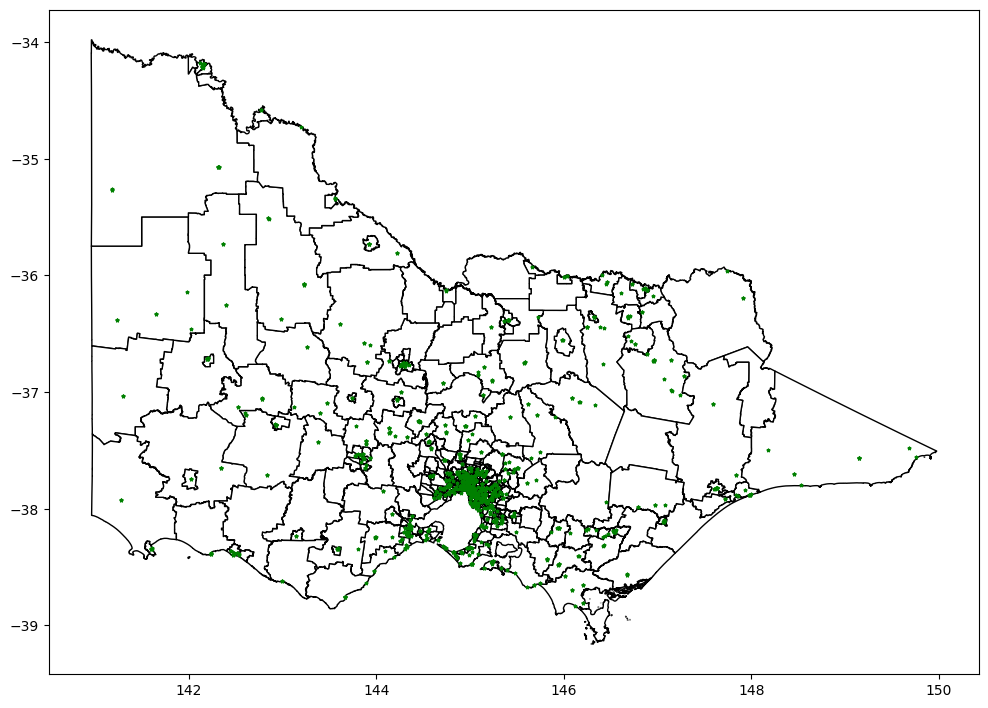

In [41]:
# Plot the visulization map to identify easily each of exisiting charging location
base = gdf_vic_sa2.plot(figsize=(12, 12), color='white', edgecolor='black')
charging_station_new.plot(figsize=(12, 12), ax=base, marker='*', color='green', markersize=5)

In [42]:
# Visulize using Folium maps
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd

# Assume gdf_vic_sa2 is your Victoria SA2 GeoDataFrame (polygons)
# charging_station_new is your charging stations GeoDataFrame (points)

# Get a central coordinate for the SA2s (for map centering)
map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=7, tiles='cartodbpositron')

# Plot SA2 polygons
folium.GeoJson(
    gdf_vic_sa2,
    style_function=lambda x: {
        'fillColor': 'white',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.1,
    },
    name='Victoria SA2'
).add_to(m)

# Add charging stations as clustered green stars
marker_cluster = MarkerCluster(name='Charging Stations').add_to(m)
for _, row in charging_station_new.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        icon=folium.Icon(color='green', icon='star', prefix='fa'),
        popup=row.get('station_name', 'Charging Station')
    ).add_to(marker_cluster)

# Add layer control
folium.LayerControl().add_to(m)

# Save or display
m.save('victoria_ev_charging_map.html')
#m # Displays in Jupyter Notebooks or compatible environments


/tmp/ipython-input-3144106430.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]


In [43]:
# Checking the crs value of each geodataframe. Each value should be same before the sjoin
print(charging_station_new.crs)
print(gdf_vic_sa2.crs)

EPSG:4326
EPSG:4326


In [44]:
# 4. Spatial Join: Assign each charger to an SA2 region
# right way around for counting points in polygons
pts_in_sa2 = gpd.sjoin(charging_station_new, gdf_vic_sa2[['SA2_CODE21','SA2_NAME21','geometry']],
                       how='left', predicate='within')
charger_count = (pts_in_sa2.groupby('SA2_CODE21')
                           .size().rename('ChargerCount')
                           .reset_index())
# if there is no any charging stations in some region, I have added for them count as zero
gdf_vic_sa2 = gdf_vic_sa2.merge(charger_count, on='SA2_CODE21', how='left').fillna({'ChargerCount':0})
gdf_vic_sa2.head()

,SA2_CODE21,SA2_NAME21,geometry,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,Area,Population density 2024(persons/km2),Total Population,Usual Resident Population,IRSAD Score,IRSAD Rank,IRSAD Decile,IRSAD Percentile,ChargerCount
0,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,52.7,381.9,20126.13,16835.0,1011.0,1315.0,6.0,56.0,3.0
1,201011002,Ballarat,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,12.4,951.1,11793.640000000001,12131.0,1040.0,1582.0,7.0,68.0,5.0
2,201011005,Buninyong,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6...",7323.0,7358.0,35.0,0.5,13.0,-46.0,68.0,51.6,951.1,49076.76,7261.0,1040.0,1587.0,7.0,68.0,3.0
3,201011006,Delacombe,"POLYGON ((143.7505 -37.59119, 143.75044 -37.59...",12865.0,14271.0,1406.0,10.9,175.0,1198.0,33.0,34.2,417.8,14288.760000000002,10661.0,947.0,671.0,3.0,29.0,0.0
4,201011007,Smythes Creek,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6...",4267.0,4278.0,11.0,0.3,22.0,-14.0,3.0,104.7,40.8,4271.76,4230.0,1005.0,1260.0,6.0,54.0,0.0


In [45]:
# Number of exsisting chrging station count in each SA 2 areas

# Assume gdf_vic_sa2 is your GeoDataFrame with 'ChargerCount' and polygons

# Center for map
map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=7, tiles='cartodbpositron')

# Choropleth for ChargerCount
folium.Choropleth(
    geo_data=gdf_vic_sa2,
    data=gdf_vic_sa2,
    columns=['SA2_CODE21', 'ChargerCount'],  # Assume you have a unique SA2 id column such as 'SA2_CODE'
    key_on='feature.properties.SA2_CODE21',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.6,
    line_color='black',
    nan_fill_color='lightgrey',
    nan_fill_opacity=0.6,
    legend_name='Number of charging stations in SA2 areas',
    highlight=True,
    name='Charger Density'
).add_to(m)

# Optional: Add tooltips/popups (show SA2 name and charge count)
for _, row in gdf_vic_sa2.iterrows():
    centroid = row.geometry.centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        popup=f"{row.get('SA2_NAME21', '')}<br>Chargers: {row['ChargerCount']}"
    ).add_to(m)

folium.LayerControl().add_to(m)

# Save or display
m.save('vic_charger_density.html')
#m  # For Jupyter notebook environments


/tmp/ipython-input-3307813741.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]


### Visulization of the Total Population in each SA2 areas

In [46]:
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import matplotlib.pyplot as plt # Keep matplotlib import as it might be used elsewhere
# Check the data type of the 'Total Population' column
print(gdf_vic_sa2['Total Population'].dtype)

# If the dtype is not numeric (e.g., 'object'), convert it to numeric
# Use errors='coerce' to turn any non-numeric values into NaN
gdf_vic_sa2['Total Population'] = pd.to_numeric(gdf_vic_sa2['Total Population'], errors='coerce')

# Check for any NaN values introduced by the conversion
print(gdf_vic_sa2['Total Population'].isnull().sum())


# Center for map (using the same centroid as before)
map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]
m_population = folium.Map(location=map_center, zoom_start=7, tiles='cartodbpositron')

# Choropleth for Total Population
folium.Choropleth(
    geo_data=gdf_vic_sa2,
    data=gdf_vic_sa2,
    columns=['SA2_CODE21', 'Total Population'],  # Assume you have a unique SA2 id column such as 'SA2_CODE'
    key_on='feature.properties.SA2_CODE21',
    fill_color='YlGnBu',  # Using a different color scheme for population
    fill_opacity=0.7,
    line_opacity=0.6,
    line_color='black',
    nan_fill_color='lightgrey',
    nan_fill_opacity=0.6,
    legend_name='Total Population in SA2 areas',
    highlight=True,
    name='Total Population'
).add_to(m_population)

# Optional: Add tooltips/popups (show SA2 name and total population)
for _, row in gdf_vic_sa2.iterrows():
    centroid = row.geometry.centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        popup=f"{row.get('SA2_NAME21', '')}<br>Total Population: {row['Total Population']}"
    ).add_to(m_population)

folium.LayerControl().add_to(m_population)

# Save or display
m_population.save('vic_total_population_map.html')
#m_population  # For Jupyter notebook environments

object
0


/tmp/ipython-input-1974486182.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]


In [47]:
import folium
import geopandas as gpd

# Assume gdf_vic_sa2 is your GeoDataFrame with 'IRSAD Score' and polygons

# Check the data type of the 'IRSAD Score' column
print(gdf_vic_sa2['IRSAD Score'].dtype)

# If the dtype is not numeric (e.g., 'object'), convert it to numeric
# Use errors='coerce' to turn any non-numeric values into NaN
gdf_vic_sa2['IRSAD Score'] = pd.to_numeric(gdf_vic_sa2['IRSAD Score'], errors='coerce')

# Check for any NaN values introduced by the conversion
print(gdf_vic_sa2['IRSAD Score'].isnull().sum())


# Center for map (using the same centroid as before)
map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]
m_irsad = folium.Map(location=map_center, zoom_start=7, tiles='cartodbpositron')

# Choropleth for IRSAD Score
folium.Choropleth(
    geo_data=gdf_vic_sa2,
    data=gdf_vic_sa2,
    columns=['SA2_CODE21', 'IRSAD Score'],  # Assume you have a unique SA2 id column such as 'SA2_CODE'
    key_on='feature.properties.SA2_CODE21',
    fill_color='OrRd',  # Using a color scheme for IRSAD Score (higher score = more red/disadvantaged)
    fill_opacity=0.7,
    line_opacity=0.6,
    line_color='black',
    nan_fill_color='lightgrey',
    nan_fill_opacity=0.6,
    legend_name='IRSAD Score in SA2 areas',
    highlight=True,
    name='IRSAD Score'
).add_to(m_irsad)

# Optional: Add tooltips/popups (show SA2 name and IRSAD score)
for _, row in gdf_vic_sa2.iterrows():
    centroid = row.geometry.centroid
    folium.Marker(
        location=[centroid.y, centroid.x],
        popup=f"{row.get('SA2_NAME21', '')}<br>IRSAD Score: {row['IRSAD Score']}"
    ).add_to(m_irsad)

folium.LayerControl().add_to(m_irsad)

# Save or display
m_irsad.save('vic_irsad_score_map.html')
#m_irsad  # For Jupyter notebook environments

object
9


/tmp/ipython-input-4017960120.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_vic_sa2.geometry.centroid.y.mean(), gdf_vic_sa2.geometry.centroid.x.mean()]


In [48]:
#gdf_vic_sa2.reset_index(inplace=True)
#gdf_vic_sa2.head()

In [49]:
gdf_vic_sa2.shape

(522, 19)

# Insert traffic flow data
The traffic flow dataset provides information on Average Annual Daily Traffic (AADT) volumes across major roads in Victoria. This measure represents the typical number of vehicles that pass a road segment each day and is widely used in transport planning. In this project, traffic flow data was integrated at the SA2 level to capture road usage intensity and identify high-mobility corridors. Areas with higher AADT values indicate stronger vehicle movement and therefore greater potential demand for accessible EV charging infrastructure. By combining traffic flow with population, amenities, and charger counts, the dataset supports the identification of strategic locations where new charging stations can maximize accessibility and coverage.

In [50]:
# import the traffic flow dataset
traffic_flow = gpd.read_file('/content/drive/MyDrive/data/aus/Traffic_flow_in_victoria_new.geojson')
traffic_flow.head()

,Road Segment ID,Road Section Description,Road Name,Travel Direction,Local Government Area,Calendar Year,Calculation Methodology,Average Annual Daily Traffic Volume,Average Annual Daily Heavy Vehicle Volume,Percentage of Heavy Vehicles,geometry
0,535.0,WESTERN FWY SE BD BTWN BALLARAT-MARYBOROUGH RD...,WESTERN FREEWAY,EAST BOUND,MOUNT ROWAN,2019.0,Estimated,6456.0,1393.0,0.22,"MULTILINESTRING ((143.80824 -37.51094, 143.808..."
1,1984.0,BALLARAT-CARNGHAM ROAD E Bd btwn BEAUFORT-CARN...,BEAUFORT-CARNGHAM ROAD,EAST BOUND,DELACOMBE,2019.0,Estimated,1769.0,128.0,0.07,"MULTILINESTRING ((143.58403 -37.58107, 143.585..."
2,1801.0,BALLARAT-CARNGHAM ROAD E Bd btwn KENNEDYS DRIV...,BALLARAT-CARNGHAM ROAD,EAST BOUND,ALFREDTON,2019.0,Estimated,3956.0,321.0,0.08,"MULTILINESTRING ((143.80759 -37.56956, 143.807..."
3,2318.0,STURT STREET E Bd btwn OLD WESTERN HIGHWAY & G...,BALLARAT-BURRUMBEET ROAD,EAST BOUND,LAKE WENDOUREE,2019.0,Estimated,12026.0,428.0,0.04,"MULTILINESTRING ((143.79344 -37.54496, 143.793..."
4,2630.0,WILTSHIRE LANE S Bd btwn BALLARAT-CARNGHAM ROA...,WILTSHIRE LANE,SOUTH BOUND,DELACOMBE,2019.0,Estimated,6815.0,463.0,0.07,"MULTILINESTRING ((143.81046 -37.56984, 143.810..."


In [51]:
# check the crs value before sjoin
print(traffic_flow.crs)
print(gdf_vic_sa2.crs)

EPSG:4326
EPSG:4326


In [52]:
# Explore the shape of the traffic flow dataset
traffic_flow.shape

(14662, 11)

In [53]:
# 4. Spatial Join: Traffic flow in SA2
traffic_flow_in_sa2 = gpd.sjoin(gdf_vic_sa2, traffic_flow, how='left', predicate='contains')
traffic_flow_in_sa2.head()

,SA2_CODE21,SA2_NAME21,geometry,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,...,Road Segment ID,Road Section Description,Road Name,Travel Direction,Local Government Area,Calendar Year,Calculation Methodology,Average Annual Daily Traffic Volume,Average Annual Daily Heavy Vehicle Volume,Percentage of Heavy Vehicles
0,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201011002,Ballarat,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,...,14592.0,DOVETON STREET N Bd btwn EYRE STREET & BALLARA...,DOVETON STREET S,NORTH BOUND,BALLARAT CENTRAL,2019.0,Actual,6043.0,675.0,0.11
1,201011002,Ballarat,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,...,15772.0,DOVETON STREET S Bd btwn STURT STREET & EYRE S...,DOVETON STREET S,SOUTH BOUND,BALLARAT CENTRAL,2019.0,Actual,5855.0,468.0,0.08
1,201011002,Ballarat,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,...,14593.0,BALLARAT-BURRUMBEET ROAD W BD BTWN DOVETON STR...,STURT STREET,WEST BOUND,BALLARAT CENTRAL,2019.0,Estimated,3981.0,216.0,0.05
1,201011002,Ballarat,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",11811.0,11773.0,-38.0,-0.3,-43.0,-103.0,108.0,...,16006.0,BALLARAT-BURRUMBEET ROAD E BD BTWN DAWSON STRE...,STURT STREET,EAST BOUND,BALLARAT CENTRAL,2019.0,Estimated,3981.0,216.0,0.05


In [54]:
# Explore the null values in full dataset
traffic_flow_in_sa2.isnull().sum()

,0
SA2_CODE21,0
SA2_NAME21,0
geometry,0
ERP at 30 June 2023,0
ERP at 30 June 2023.1,0
ERP change 2023-24,0
%,0
Natural increase,0
Net internal migration,0
Net overseas migration,0


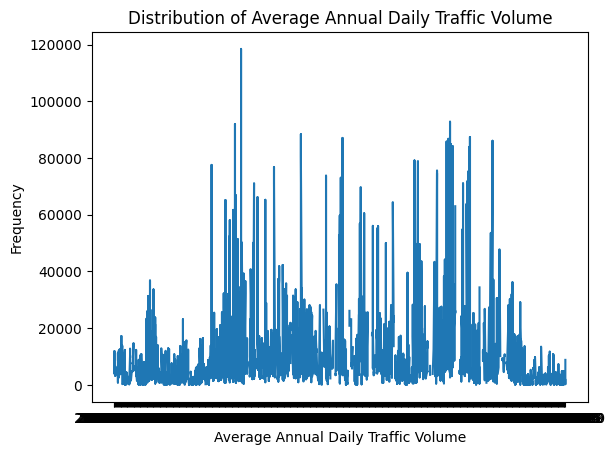

In [55]:
# Create a line plot to visualize the distribution of Average Annual Daily Traffic Volume
# Plotting SA2_CODE21 on the x-axis and Average Annual Daily Traffic Volume on the y-axis
plt.plot(traffic_flow_in_sa2['SA2_CODE21'], traffic_flow_in_sa2['Average Annual Daily Traffic Volume'])

# Label the x-axis
plt.xlabel('Average Annual Daily Traffic Volume')

# Label the y-axis
plt.ylabel('Frequency') # Note: This might be misleading for this plot, perhaps 'Traffic Volume' or similar would be better depending on the user's intent.

# Add a title to the plot
plt.title('Distribution of Average Annual Daily Traffic Volume')

# Display the plot
plt.show()

In [56]:
# esplore the column of full dataset which are in SA2, population, SFIEA and traffic flow data
traffic_flow_in_sa2.columns

Index(['SA2_CODE21', 'SA2_NAME21', 'geometry', 'ERP at 30 June 2023',
       'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
       'Net internal migration', 'Net overseas migration', 'Area',
       'Population density 2024(persons/km2)', 'Total Population',
       'Usual Resident Population', 'IRSAD Score', 'IRSAD Rank',
       'IRSAD Decile', 'IRSAD Percentile', 'ChargerCount', 'index_right',
       'Road Segment ID', 'Road Section Description', 'Road Name',
       'Travel Direction', 'Local Government Area', 'Calendar Year',
       'Calculation Methodology', 'Average Annual Daily Traffic Volume',
       'Average Annual Daily Heavy Vehicle Volume',
       'Percentage of Heavy Vehicles'],
      dtype='object')

In [57]:
# remove unwanted columns
traffic_flow_in_sa2 = traffic_flow_in_sa2[['SA2_CODE21', 'geometry',
        #'ERP at 30 June 2023', 'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
       #'Net internal migration', 'Net overseas migration',
                                           'Area',
       'Population density 2024(persons/km2)', 'Total Population',
       'Usual Resident Population', 'IRSAD Score', 'IRSAD Rank',
       'IRSAD Decile', 'IRSAD Percentile', 'ChargerCount',
       #'index_right', 'Road Segment ID',
                                           'Road Section Description',
       'Road Name', 'Travel Direction', 'Local Government Area',
       'Calendar Year',
                                           #'Calculation Methodology',
       'Average Annual Daily Traffic Volume',
       #'Average Annual Daily Heavy Vehicle Volume',
       #'Percentage of Heavy Vehicles'
                                           ]]

In [58]:
traffic_flow_in_sa2.isnull().sum()

,0
SA2_CODE21,0
geometry,0
Area,0
Population density 2024(persons/km2),0
Total Population,0
Usual Resident Population,0
IRSAD Score,63
IRSAD Rank,0
IRSAD Decile,0
IRSAD Percentile,0


## Finding amenities data
The amenities dataset provides the locations of key public and commercial facilities such as restaurants, supermarkets, hospitals, schools, and shopping centers. These points of interest (POIs) are important in EV infrastructure planning because drivers often prefer to charge their vehicles while doing other activities. In this project, amenities data was spatially linked to SA2 areas to calculate amenities density and to evaluate proximity to potential charging sites. By including amenities in the analysis, the project ensures that new charging stations are located in practical, high-usage environments, increasing convenience for users and encouraging adoption of electric vehicles.

In [59]:
# import the shape file of point of interest in australia
gdf_pois = gpd.read_file("/content/drive/MyDrive/data/aus/gis_osm_pois_free_1.shp")

In [60]:
# create a geometry object as poi_geometry
gdf_pois['poi_geometry'] = gdf_pois['geometry']

In [61]:
gdf_pois.head()

,osm_id,code,fclass,name,geometry,poi_geometry
0,8592614,2903,drinking_water,None,POINT (151.28476 -33.79908),POINT (151.28476 -33.79908)
1,8594872,2742,viewpoint,Burragula Lookout,POINT (151.29842 -33.82322),POINT (151.29842 -33.82322)
2,12219054,2742,viewpoint,Shipwreck Lookout,POINT (151.07836 -33.8346),POINT (151.07836 -33.8346)
3,13757642,2301,restaurant,Singapore Famous BBQ Pork,POINT (151.20391 -33.88078),POINT (151.20391 -33.88078)
4,13767762,2007,library,Ultimo Library,POINT (151.19777 -33.87796),POINT (151.19777 -33.87796)


In [62]:
# checking the unique categories of point of interest
gdf_pois['fclass'].unique()

array(['drinking_water', 'viewpoint', 'restaurant', 'library', 'bench',
       'toilet', 'memorial', 'attraction', 'artwork', 'post_box',
       'monument', 'pub', 'lighthouse', 'park', 'stadium', 'supermarket',
       'tourist_info', 'arts_centre', 'mall', 'playground', 'beverages',
       'cafe', 'picnic_site', 'fast_food', 'police', 'motel', 'theatre',
       'bicycle_rental', 'hostel', 'hotel', 'bicycle_shop', 'chemist',
       'archaeological', 'post_office', 'market_place', 'bank', 'bar',
       'food_court', 'atm', 'recycling', 'cinema', 'museum', 'guesthouse',
       'clothes', 'telephone', 'bakery', 'pharmacy', 'clinic',
       'beauty_shop', 'laundry', 'caravan_site', 'department_store',
       'fire_station', 'sports_shop', 'school', 'doctors', 'butcher',
       'dentist', 'convenience', 'greengrocer', 'public_building',
       'ruins', 'camp_site', 'tower', 'hospital', 'observation_tower',
       'courthouse', 'sports_centre', 'water_tower', 'community_centre',
       'town

In [63]:
# filtered some points of interest which are most important for our analysis
filtered_gdf_pois = gdf_pois[gdf_pois['fclass'].isin(['pub', 'stadium', 'supermarket','mall', 'playground', 'fast_food', 'police',
                                                      'bank', 'bar','pharmacy','food_court', 'clothes', 'school','hospital', 'police','parking',
                                                      'parking_space', 'bus_station','university','exhibition_centre','nightclub','post_office'])]


In [64]:
filtered_gdf_pois['fclass'].unique()

array(['pub', 'stadium', 'supermarket', 'mall', 'playground', 'fast_food',
       'police', 'post_office', 'bank', 'bar', 'food_court', 'clothes',
       'pharmacy', 'school', 'hospital', 'nightclub', 'university'],
      dtype=object)

In [65]:
# checking for null values
filtered_gdf_pois.isnull().sum()

,0
osm_id,0
code,0
fclass,0
name,7500
geometry,0
poi_geometry,0


In [66]:
# 4. Spatial Join: Amenities in SA2
# Join SA2 areas to amenities to keep all SA2 areas
filtered_gdf_sa2_pois = gpd.sjoin(gdf_vic_sa2, filtered_gdf_pois,
                       how='left', predicate='contains')



In [67]:
filtered_gdf_sa2_pois.shape

(9709, 25)

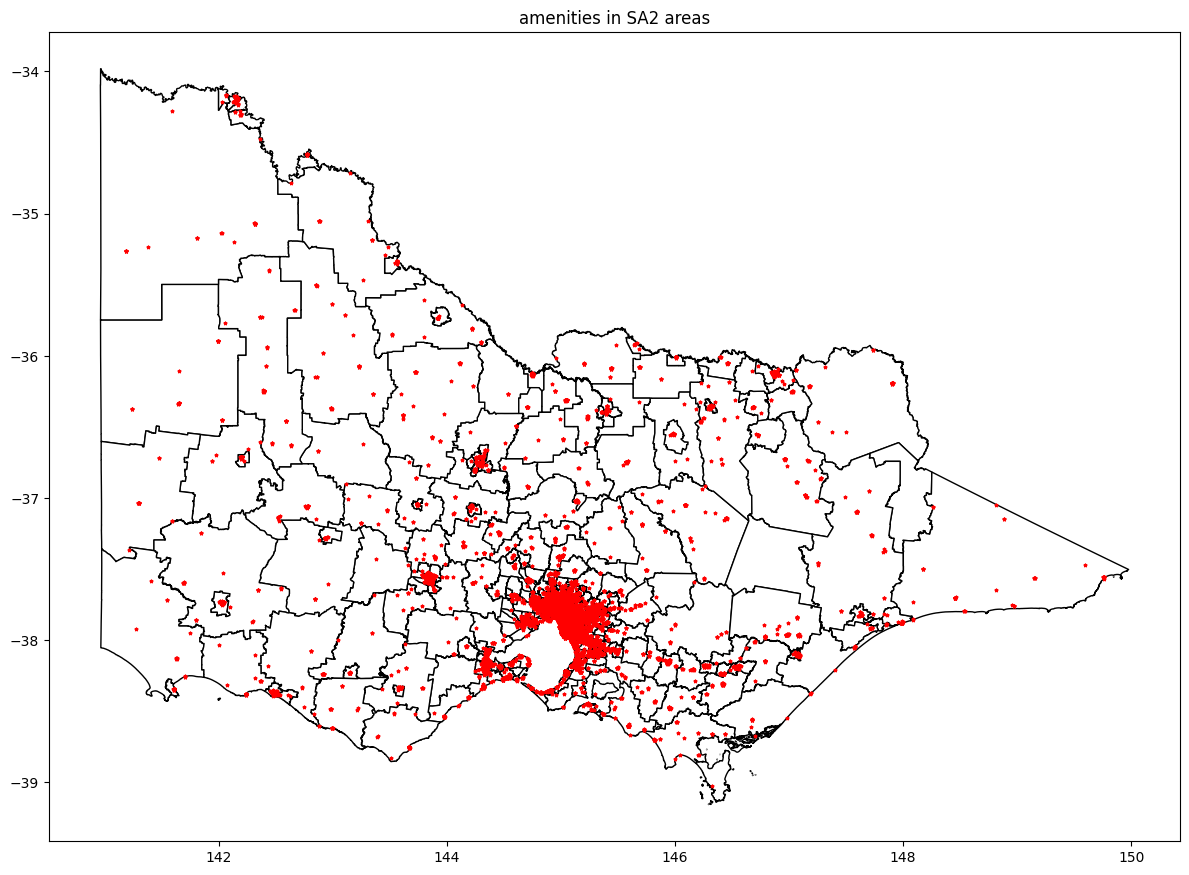

In [68]:
#Plot the point of interest in each SA2
base = gdf_vic_sa2.plot(figsize=(12, 12), color='white', edgecolor='black')
filtered_gdf_sa2_pois['poi_geometry'].plot(figsize=(12, 12), ax=base, marker='*', color='red', markersize=5)
plt.title("amenities in SA2 areas")
plt.tight_layout()
plt.show()

In [69]:
# Count number of amenities in each statistical areas
# right way around for counting points in polygons
amenities_count = (filtered_gdf_sa2_pois.groupby('SA2_CODE21')
                           .size().rename('AmenitiesCount')
                           .reset_index())
# And merege each count with final dataset which are included other data
all_gdf_vic_sa2 = filtered_gdf_sa2_pois.merge(amenities_count, on='SA2_CODE21', how='left')
all_gdf_vic_sa2.head()

,SA2_CODE21,SA2_NAME21,geometry,ERP at 30 June 2023,ERP at 30 June 2023.1,ERP change 2023-24,%,Natural increase,Net internal migration,Net overseas migration,...,IRSAD Decile,IRSAD Percentile,ChargerCount,index_right,osm_id,code,fclass,name,poi_geometry,AmenitiesCount
0,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,...,6.0,56.0,3.0,252824.0,12401585400,2512.0,clothes,Impact Teamwear,POINT (143.81182 -37.56636),13
1,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,...,6.0,56.0,3.0,96628.0,4889739646,2302.0,fast_food,Subway,POINT (143.81818 -37.55611),13
2,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,...,6.0,56.0,3.0,33895.0,1734071340,2205.0,playground,None,POINT (143.78804 -37.55585),13
3,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,...,6.0,56.0,3.0,96630.0,4889761329,2302.0,fast_food,Arch Fish Shop,POINT (143.81794 -37.55564),13
4,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",18995.0,20130.0,1135.0,6.0,171.0,851.0,113.0,...,6.0,56.0,3.0,91362.0,4584243592,2005.0,post_office,Alfredton LPO,POINT (143.81787 -37.5556),13


In [70]:
# Drop the unneccessary columns in final data set
all_gdf_vic_sa2.drop(columns=['fclass', 'poi_geometry'], inplace=True, axis='columns')

# Merge traffic data and other data to getting final dataset

In [71]:
# Explore all the columns
all_gdf_vic_sa2.columns

Index(['SA2_CODE21', 'SA2_NAME21', 'geometry', 'ERP at 30 June 2023',
       'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
       'Net internal migration', 'Net overseas migration', 'Area',
       'Population density 2024(persons/km2)', 'Total Population',
       'Usual Resident Population', 'IRSAD Score', 'IRSAD Rank',
       'IRSAD Decile', 'IRSAD Percentile', 'ChargerCount', 'index_right',
       'osm_id', 'code', 'name', 'AmenitiesCount'],
      dtype='object')

In [72]:
all_gdf_vic_sa2 = all_gdf_vic_sa2[['SA2_CODE21', 'SA2_NAME21', 'geometry',
                                   #'ERP at 30 June 2023',
      # 'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
      # 'Net internal migration', 'Net overseas migration',
                                   'Area',
       'Population density 2024(persons/km2)', 'Total Population',
       'Usual Resident Population', 'IRSAD Score', 'IRSAD Rank',
       #'IRSAD Decile', 'IRSAD Percentile',
                                   'ChargerCount',
                                   #'index_right',
       #'osm_id', 'code', 'name',
                                   'AmenitiesCount']]

In [73]:
all_gdf_vic_sa2.head()

,SA2_CODE21,SA2_NAME21,geometry,Area,Population density 2024(persons/km2),Total Population,Usual Resident Population,IRSAD Score,IRSAD Rank,ChargerCount,AmenitiesCount
0,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",52.7,381.9,20126.13,16835.0,1011.0,1315.0,3.0,13
1,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",52.7,381.9,20126.13,16835.0,1011.0,1315.0,3.0,13
2,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",52.7,381.9,20126.13,16835.0,1011.0,1315.0,3.0,13
3,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",52.7,381.9,20126.13,16835.0,1011.0,1315.0,3.0,13
4,201011001,Alfredton,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",52.7,381.9,20126.13,16835.0,1011.0,1315.0,3.0,13


In [74]:
traffic_flow_in_sa2.head()

,SA2_CODE21,geometry,Area,Population density 2024(persons/km2),Total Population,Usual Resident Population,IRSAD Score,IRSAD Rank,IRSAD Decile,IRSAD Percentile,ChargerCount,Road Section Description,Road Name,Travel Direction,Local Government Area,Calendar Year,Average Annual Daily Traffic Volume
0,201011001,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",52.7,381.9,20126.13,16835.0,1011.0,1315.0,6.0,56.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",12.4,951.1,11793.64,12131.0,1040.0,1582.0,7.0,68.0,5.0,DOVETON STREET N Bd btwn EYRE STREET & BALLARA...,DOVETON STREET S,NORTH BOUND,BALLARAT CENTRAL,2019.0,6043.0
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",12.4,951.1,11793.64,12131.0,1040.0,1582.0,7.0,68.0,5.0,DOVETON STREET S Bd btwn STURT STREET & EYRE S...,DOVETON STREET S,SOUTH BOUND,BALLARAT CENTRAL,2019.0,5855.0
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",12.4,951.1,11793.64,12131.0,1040.0,1582.0,7.0,68.0,5.0,BALLARAT-BURRUMBEET ROAD W BD BTWN DOVETON STR...,STURT STREET,WEST BOUND,BALLARAT CENTRAL,2019.0,3981.0
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",12.4,951.1,11793.64,12131.0,1040.0,1582.0,7.0,68.0,5.0,BALLARAT-BURRUMBEET ROAD E BD BTWN DAWSON STRE...,STURT STREET,EAST BOUND,BALLARAT CENTRAL,2019.0,3981.0


In [75]:
traffic_flow_in_sa2 = traffic_flow_in_sa2[['SA2_CODE21', 'geometry',
        #'ERP at 30 June 2023', 'ERP at 30 June 2023.1', 'ERP change 2023-24', '%', 'Natural increase',
       #'Net internal migration', 'Net overseas migration',
                                           #'Area',
       #'Population density 2024(persons/km2)', 'Total Population',
       #'Usual Resident Population', 'IRSAD Score', 'IRSAD Rank',
       #'IRSAD Decile', 'IRSAD Percentile', 'ChargerCount',
       #'index_right', 'Road Segment ID',
                                           #'Road Section Description',
       #'Road Name', 'Travel Direction', 'Local Government Area',
       #'Calendar Year',
                                           #'Calculation Methodology',
       'Average Annual Daily Traffic Volume',
       #'Average Annual Daily Heavy Vehicle Volume',
       #'Percentage of Heavy Vehicles'
                                           ]]

In [76]:
traffic_flow_in_sa2.head()

,SA2_CODE21,geometry,Average Annual Daily Traffic Volume
0,201011001,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5...",NaN
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",6043.0
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",5855.0
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",3981.0
1,201011002,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5...",3981.0


In [77]:
# Merge traffic data and, the SA2 data
final_data_sa2 = pd.merge(all_gdf_vic_sa2, traffic_flow_in_sa2, on='SA2_CODE21', how='left')

In [78]:
final_data_sa2.drop(columns=['geometry_y'], inplace=True, axis='columns')

# Handle Duplicate value

In [79]:
# Droping the duplicate value
final_data_sa2.drop_duplicates(inplace=True)

In [80]:
# Explore the duplicated sum
print(final_data_sa2.duplicated().sum())
print(final_data_sa2.shape)

0
(7578, 12)


In essence, this code is consolidating the data for each SA2 area after the spatial joins, ensuring that you have a single row per SA2 with relevant aggregated or representative values for population, socio-economic status, existing chargers, amenities, and traffic flow.

In [81]:
final_data_sa2 = final_data_sa2.groupby('SA2_CODE21').agg({
    'SA2_NAME21': 'first',
    'Population density 2024(persons/km2)': 'first',   # same across duplicates
    'Total Population': 'first',
    'IRSAD Score': 'first',
    'ChargerCount': 'first',         # chargers add up
    'AmenitiesCount': 'first',       # amenities add up
    'Average Annual Daily Traffic Volume': 'mean',   # or 'max' depending on choice
    'geometry_x': 'first'
}).reset_index()



#Taking care of the missing values

In [82]:
# Explore the missing values
final_data_sa2.isnull().sum()

,0
SA2_CODE21,0
SA2_NAME21,0
Population density 2024(persons/km2),0
Total Population,0
IRSAD Score,9
ChargerCount,0
AmenitiesCount,0
Average Annual Daily Traffic Volume,54
geometry_x,0


In [83]:
# Calculate mean of the column (ignores NaN automatically)
mean_val = final_data_sa2["Average Annual Daily Traffic Volume"].mean()

# Fill missing values with the mean
final_data_sa2["Average Annual Daily Traffic Volume"].fillna(mean_val, inplace=True)
# Fissing values in IRSAD score is filled with the zero
final_data_sa2['IRSAD Score'] = final_data_sa2['IRSAD Score'].fillna(0)

/tmp/ipython-input-1799483390.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data_sa2["Average Annual Daily Traffic Volume"].fillna(mean_val, inplace=True)


In [84]:
final_data_sa2.isnull().sum()

,0
SA2_CODE21,0
SA2_NAME21,0
Population density 2024(persons/km2),0
Total Population,0
IRSAD Score,0
ChargerCount,0
AmenitiesCount,0
Average Annual Daily Traffic Volume,0
geometry_x,0


In [85]:
final_data_sa2 = final_data_sa2.set_geometry('geometry_x')
final_data_sa2.crs = 'EPSG:4326'
final_data_sa2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
final_data_sa2.head()

,SA2_CODE21,SA2_NAME21,Population density 2024(persons/km2),Total Population,IRSAD Score,ChargerCount,AmenitiesCount,Average Annual Daily Traffic Volume,geometry_x
0,201011001,Alfredton,381.9,20126.13,1011.0,3.0,13,9692.036076,"POLYGON ((143.78282 -37.56666, 143.75558 -37.5..."
1,201011002,Ballarat,951.1,11793.64,1040.0,5.0,34,8222.227273,"POLYGON ((143.81896 -37.55582, 143.81644 -37.5..."
2,201011005,Buninyong,951.1,49076.76,1040.0,3.0,11,4408.875000,"POLYGON ((143.84171 -37.61596, 143.84176 -37.6..."
3,201011006,Delacombe,417.8,14288.76,947.0,0.0,8,4324.000000,"POLYGON ((143.7505 -37.59119, 143.75044 -37.59..."
4,201011007,Smythes Creek,40.8,4271.76,1005.0,0.0,1,9692.036076,"POLYGON ((143.73296 -37.62333, 143.73263 -37.6..."


In [87]:
final_data_sa2.shape

(522, 9)

In [88]:
final_data_sa2.to_csv("final_data_sa2.csv")